<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Experimental-Metadata" data-toc-modified-id="Experimental-Metadata-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experimental Metadata</a></span></li><li><span><a href="#Expression-data" data-toc-modified-id="Expression-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Expression data</a></span><ul class="toc-item"><li><span><a href="#Replicate-Correlations" data-toc-modified-id="Replicate-Correlations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Replicate Correlations</a></span></li><li><span><a href="#Centering-to-reference-condition" data-toc-modified-id="Centering-to-reference-condition-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Centering to reference condition</a></span></li></ul></li><li><span><a href="#Exploring-I-modulons" data-toc-modified-id="Exploring-I-modulons-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring I-modulons</a></span><ul class="toc-item"><li><span><a href="#Important-dataframes" data-toc-modified-id="Important-dataframes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Important dataframes</a></span></li><li><span><a href="#Explained-variance" data-toc-modified-id="Explained-variance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Explained variance</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Get-I-modulon-information" data-toc-modified-id="Get-I-modulon-information-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Get I-modulon information</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import itertools

import matplotlib.pyplot as plt
from scipy import stats

# Load data

In [2]:
trn = pd.read_csv(('TRN.csv'),index_col=0)
gene_info = pd.read_csv(('gene_info.csv'),index_col=0)

log_tpm = pd.read_csv(('log_tpm.csv'),index_col=0)
metadata = pd.read_csv(('metadata.csv'),index_col=0)

S = pd.read_csv(('S.csv'),index_col=0)
A = pd.read_csv(('A.csv'),index_col=0)

imodulons = pd.read_csv(('curated_enrichments.csv'),index_col=0)

# Expression data

## Replicate Correlations

The values in log_tpm are centered to a control condition before performing ICA. Here, we assess the correlations between replicates and non-replicates in both the centered dataset and the un-centered dataset.

## Centering to reference condition

**Data must be centered to a reference condition before performing ICA.**

In [3]:
# essentially this means that the tpm data is subtracted for the mean of the values of the control samples 
log_tpm_centered = log_tpm.sub(log_tpm[['control__wt_glc__1','control__wt_glc__2']].mean(axis=1),axis=0)


# Working with our data

### ACCESSING OUR DATA

In [4]:
X = pd.read_csv(('BENG212_Project_mod_v2.csv'),index_col=0)
idx = X.index.intersection(log_tpm.index)
X_mod=X.loc[idx]
S_mod=S.loc[idx]

S_inv=np.linalg.pinv(S_mod)
# display(X_mod)
# print(S_inv.shape)
A_final=np.matmul(S_inv,X_mod.values)
print(A_final.shape)

(92, 18)


In [5]:
A_pd=pd.DataFrame(A_final, index=S.columns, columns=X.columns)

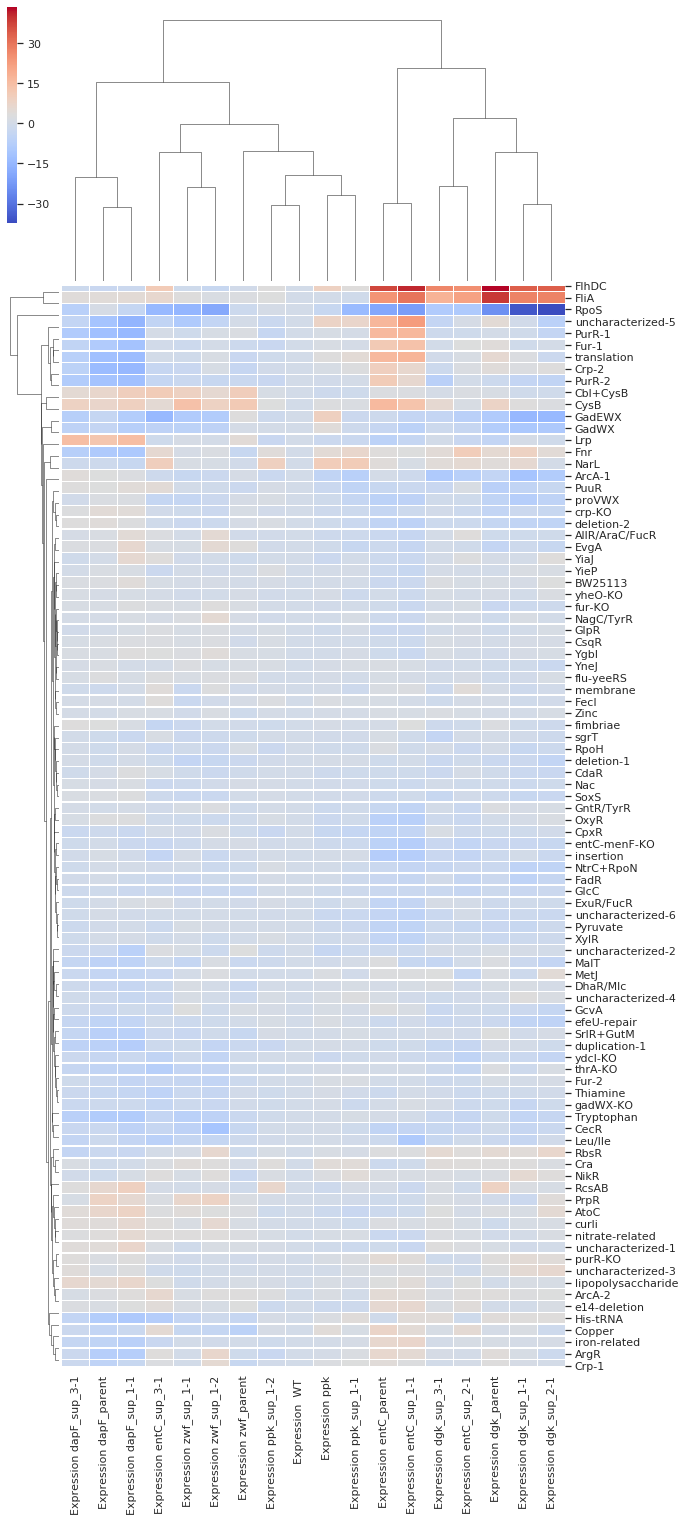

In [6]:
import seaborn as sns
sns.set(color_codes=True)

g = sns.clustermap(A_pd,cmap='coolwarm',linewidth=0.3,figsize=(10, 25))

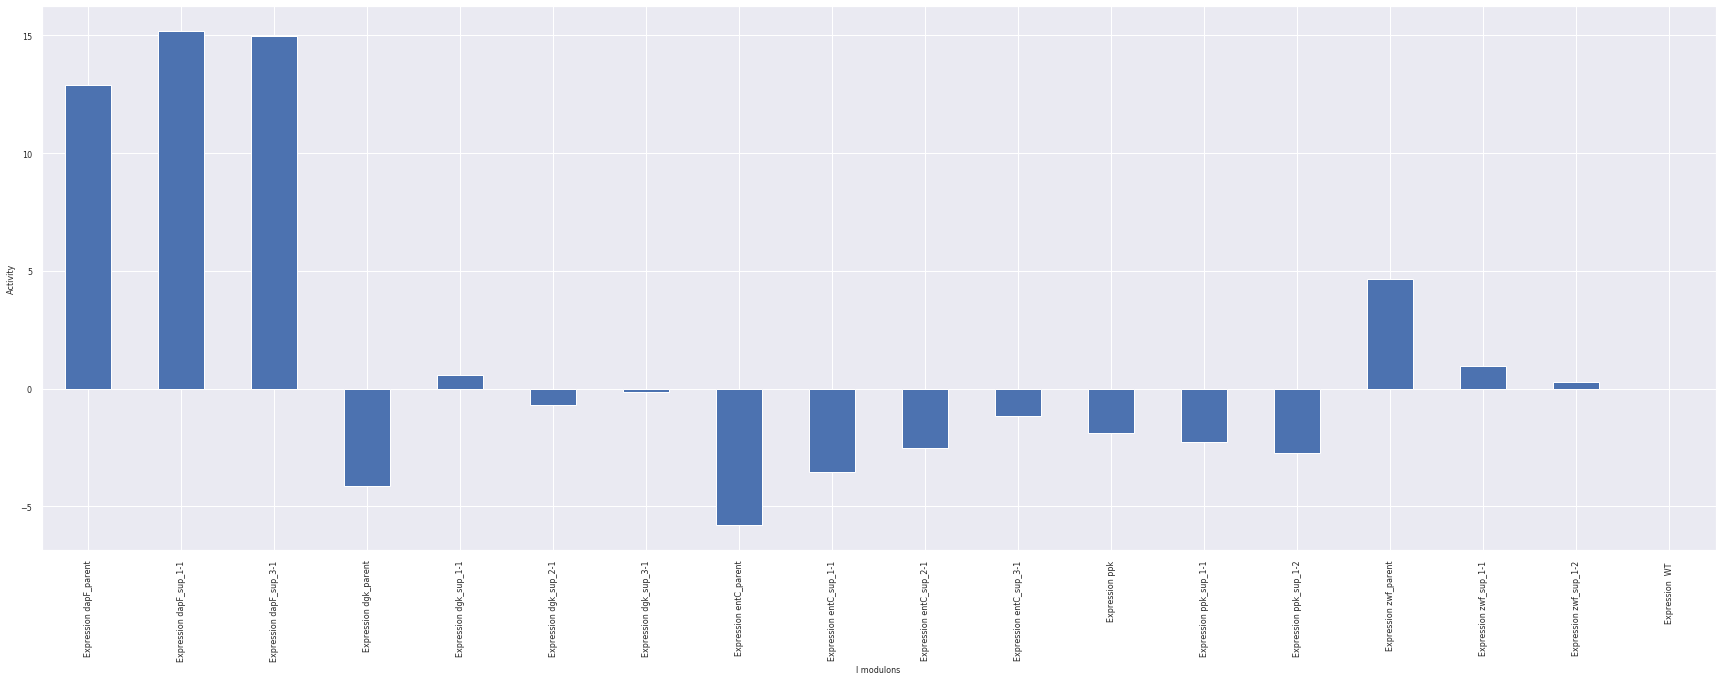

In [17]:
row=A_pd.loc['Lrp']
ax=row.plot(kind='bar',figsize=(30,10),fontsize=8)
ax.set_xlabel('I modulons',fontsize=8)
ax.set_ylabel('Activity',fontsize=8)
plt.show(None)

In [ ]:
row=A_pd.loc['Lrp',['Expression dgk_parent','Expression dgk_sup_1-1','Expression dgk_sup_2-1']]
ax=row.plot(kind='bar',figsize=(30,10),fontsize=20)
# ax.set_xlabel('I modulons',fontsize=0)
ax.set_ylabel('Activity of i-mod',fontsize=30)
plt.show(None)

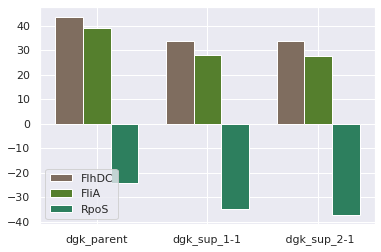

In [44]:
bars1=A_pd.loc['FlhDC',['Expression dgk_parent','Expression dgk_sup_1-1','Expression dgk_sup_2-1']].values
bars2=A_pd.loc['FliA',['Expression dgk_parent','Expression dgk_sup_1-1','Expression dgk_sup_2-1']].values
bars3=A_pd.loc['RpoS',['Expression dgk_parent','Expression dgk_sup_1-1','Expression dgk_sup_2-1']].values
# print(bars1)
# print(bars2)
# print(bars3)


barWidth = 0.25
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='FlhDC')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='FliA')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='RpoS')
 
# Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['dgk_parent', 'dgk_sup_1-1', ' dgk_sup_2-1'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


plt.show()